In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import geopy.distance as geo
import json
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
warnings.filterwarnings(action="ignore")
%matplotlib inline

In [28]:
df = pd.read_csv('../input/availability.csv')

In [9]:
df.head()

,station_id,station_name,station_status,latitude,longitude,zip,borough,hood,available_bikes,available_docks,...,created_at,weather_summary,precip_intensity,temperature,humidity,wind_speed,wind_gust,cloud_cover,weather_status,updated_at
0,72,W 52 St & 11 Ave,In Service,40.767272,-73.993929,10019.0,Manhattan,Hell's Kitchen,0,53,...,2019-05-11 05:10:08,Light Rain,0.04,56.13,0.95,5.99,7.08,1.0,observed,2019-05-12 12:04:02
1,72,W 52 St & 11 Ave,In Service,40.767272,-73.993929,10019.0,Manhattan,Hell's Kitchen,7,46,...,2019-05-11 05:08:06,Light Rain,0.04,55.23,0.97,6.84,7.79,1.0,observed,2019-05-12 12:04:02
2,72,W 52 St & 11 Ave,In Service,40.767272,-73.993929,10019.0,Manhattan,Hell's Kitchen,7,46,...,2019-05-11 05:08:06,Light Rain,0.04,55.23,0.97,6.84,7.79,1.0,observed,2019-05-12 12:04:02
3,72,W 52 St & 11 Ave,In Service,40.767272,-73.993929,10019.0,Manhattan,Hell's Kitchen,7,46,...,2019-05-11 05:08:06,Light Rain,0.04,55.23,0.97,6.84,7.79,1.0,observed,2019-05-12 12:04:02
4,72,W 52 St & 11 Ave,In Service,40.767272,-73.993929,10019.0,Manhattan,Hell's Kitchen,8,45,...,2019-05-11 05:06:06,Light Rain,0.05,55.00,0.97,6.58,7.31,1.0,observed,2019-05-12 12:04:02


In [12]:
df.columns

Index(['station_id', 'station_name', 'station_status', 'latitude', 'longitude',
       'zip', 'borough', 'hood', 'available_bikes', 'available_docks',
       'time_interval', 'created_at', 'weather_summary', 'precip_intensity',
       'temperature', 'humidity', 'wind_speed', 'wind_gust', 'cloud_cover',
       'weather_status', 'updated_at'],
      dtype='object')

In [17]:
df['hour'] = df['time_interval'].apply(lambda x: x.split(' ')[0] + ' ' + x.split(' ')[1].split(':')[0] + ':00:00')

In [15]:
df_by_time.head()

,station_id,station_name,station_status,latitude,longitude,zip,borough,hood,available_bikes,available_docks,...,created_at,weather_summary,precip_intensity,temperature,humidity,wind_speed,wind_gust,cloud_cover,weather_status,updated_at
0,72,W 52 St & 11 Ave,In Service,40.767272,-73.993929,10019.0,Manhattan,Hell's Kitchen,0,53,...,2019-05-11 05:10:08,Light Rain,0.04,56.13,0.95,5.99,7.08,1.0,observed,2019-05-12 12:04:02
1,72,W 52 St & 11 Ave,In Service,40.767272,-73.993929,10019.0,Manhattan,Hell's Kitchen,7,46,...,2019-05-11 05:08:06,Light Rain,0.04,55.23,0.97,6.84,7.79,1.0,observed,2019-05-12 12:04:02
2,72,W 52 St & 11 Ave,In Service,40.767272,-73.993929,10019.0,Manhattan,Hell's Kitchen,7,46,...,2019-05-11 05:08:06,Light Rain,0.04,55.23,0.97,6.84,7.79,1.0,observed,2019-05-12 12:04:02
3,72,W 52 St & 11 Ave,In Service,40.767272,-73.993929,10019.0,Manhattan,Hell's Kitchen,7,46,...,2019-05-11 05:08:06,Light Rain,0.04,55.23,0.97,6.84,7.79,1.0,observed,2019-05-12 12:04:02
4,72,W 52 St & 11 Ave,In Service,40.767272,-73.993929,10019.0,Manhattan,Hell's Kitchen,8,45,...,2019-05-11 05:06:06,Light Rain,0.05,55.00,0.97,6.58,7.31,1.0,observed,2019-05-12 12:04:02
5,72,W 52 St & 11 Ave,In Service,40.767272,-73.993929,10019.0,Manhattan,Hell's Kitchen,8,45,...,2019-05-11 05:06:06,Light Rain,0.05,55.00,0.97,6.58,7.31,1.0,observed,2019-05-12 12:04:02
6,72,W 52 St & 11 Ave,In Service,40.767272,-73.993929,10019.0,Manhattan,Hell's Kitchen,8,45,...,2019-05-11 05:06:06,Light Rain,0.05,55.00,0.97,6.58,7.31,1.0,observed,2019-05-12 12:04:02
7,72,W 52 St & 11 Ave,In Service,40.767272,-73.993929,10019.0,Manhattan,Hell's Kitchen,8,45,...,2019-05-11 05:06:06,Light Rain,0.05,55.00,0.97,6.58,7.31,1.0,observed,2019-05-12 12:04:02
8,72,W 52 St & 11 Ave,In Service,40.767272,-73.993929,10019.0,Manhattan,Hell's Kitchen,8,45,...,2019-05-11 05:04:02,Rain,0.06,54.37,0.97,6.39,7.65,1.0,observed,2019-05-12 12:04:02
9,72,W 52 St & 11 Ave,In Service,40.767272,-73.993929,10019.0,Manhattan,Hell's Kitchen,7,46,...,2019-05-11 05:04:02,Rain,0.06,54.37,0.97,6.39,7.65,1.0,observed,2019-05-12 12:04:02


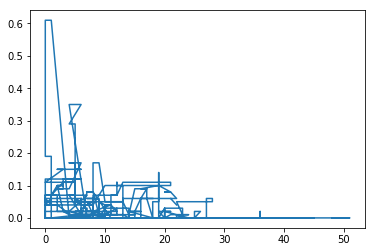

In [11]:
plt.plot(df[df["station_id"] == 72]['available_bikes'], df[df["station_id"] == 72]['precip_intensity'])

In [19]:
df = df[df['station_status'] == 'In Service']
# df = df[df['borough'] != 'New Jersey']
# df['hour'] = df['time_interval'].apply(lambda x: x.split(' ')[0] + ' ' + x.split(' ')[1].split(':')[0] + ':00:00')

In [23]:
hoods = df.groupby(['borough','hood', 'hour'])['available_bikes','available_docks', 'hour'].sum().reset_index()
hoods['total_available'] = hoods.apply(lambda x: x['available_bikes'] + x['available_docks'], axis=1)
# hoods['percent_available'] = hoods.apply(lambda x: x['available_bikes'] / x['total_available'], axis=1)
hoods_filtered = hoods[hoods['total_available'] > 1573]

In [24]:
hoods_filtered.describe()

,available_bikes,available_docks,total_available
count,38416.000000,38416.000000,38416.000000
mean,907.433517,1662.815285,2570.248803
std,556.111979,816.590203,831.211060
min,0.000000,4.000000,1574.000000
25%,475.000000,1084.000000,1856.000000
50%,828.000000,1496.000000,2183.000000
75%,1304.000000,2193.000000,3269.000000
max,3088.000000,4187.000000,4328.000000


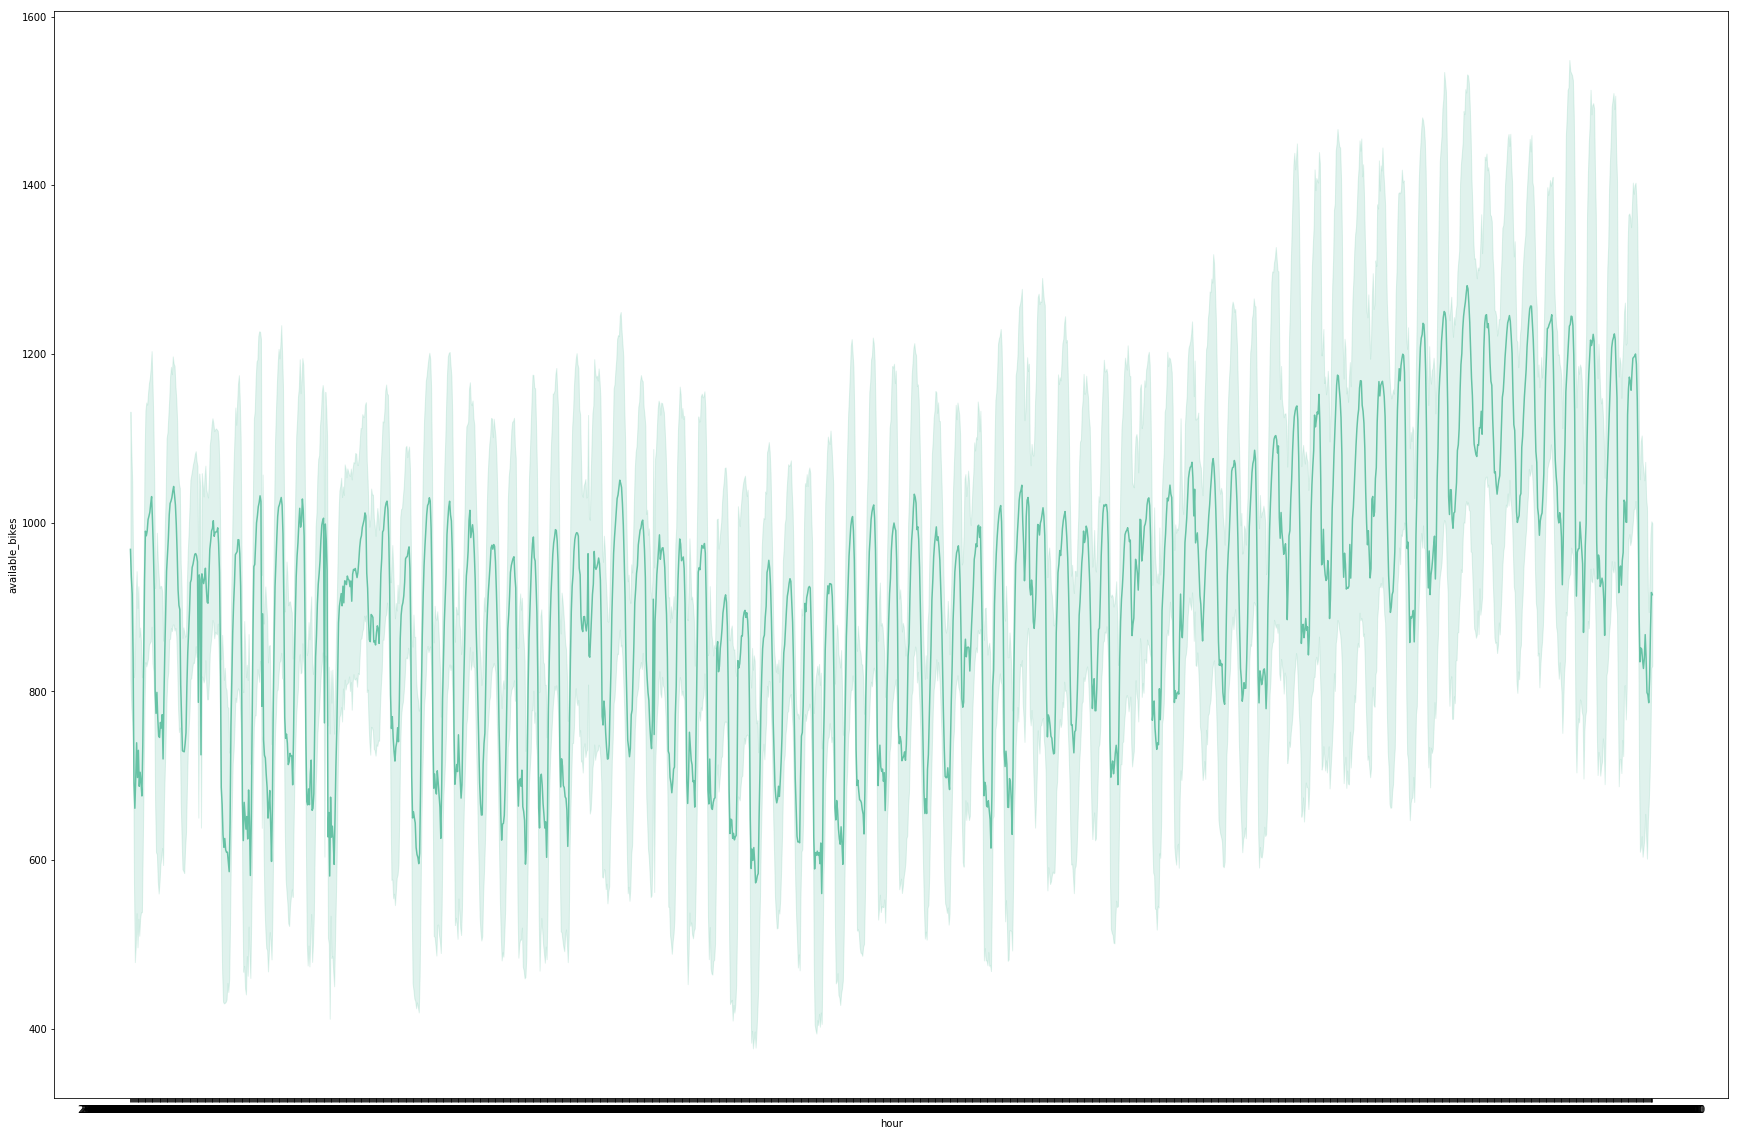

In [30]:
plt.figure(figsize=(30, 20))
sns.set_palette('Set2')
sns.lineplot(x='hour', y='available_bikes', data=hoods_filtered, ci=90)

In [26]:
df = df.groupby(['station_id', 'latitude', 'longitude', 'borough', 'station_status']).mean()
df = df.reset_index()
df = df.set_index('station_id')
df.head()

,latitude,longitude,borough,station_status,zip,available_bikes,available_docks,precip_intensity,temperature,humidity,wind_speed,wind_gust,cloud_cover
station_id,,,,,,,,,,,,,
72,40.767272,-73.993929,Manhattan,In Service,10019.0,11.880214,41.467532,0.009386,63.019593,0.666966,5.440416,6.517217,0.613319
79,40.719116,-74.006667,Manhattan,In Service,10013.0,10.821082,21.287461,0.010489,62.618662,0.689477,5.647801,6.782014,0.641012
82,40.711174,-74.000165,Manhattan,In Service,10038.0,13.685922,12.520900,0.009926,62.388271,0.693596,5.787423,6.833973,0.648415
83,40.683826,-73.976323,Brooklyn,In Service,11217.0,35.301152,25.671139,0.009900,62.045992,0.700127,6.133079,7.212462,0.649735
119,40.696089,-73.978034,Brooklyn,In Service,11205.0,9.897334,6.618648,0.010036,61.973672,0.702628,5.927015,6.991417,0.654329


In [14]:
def getDistance(x, y):
    return geo.distance(x, y).km

closest_stations = {}

for stationX in df.index:
    closest_stations[stationX] = []
    for stationY in df.index:
        if stationX != stationY:
            try:
                distance = getDistance((df.loc[stationX, 'latitude'], df.loc[stationX, 'longitude']),(df.loc[stationY, 'latitude'], df.loc[stationY, 'longitude']))
                y_in_service = df.loc[stationY, 'station_status'] == 'In Service'
            except:
                print('Error')
                print('x:', stationX)
                print('y:', stationY)
                break
            if distance < .5 and y_in_service:
                closest_stations[stationX].append({'station_id': stationY, 'distance': distance})

contents = json.dumps(closest_stations)
file = open("../output/nearby_stations.json","a")
file.write(contents)
file.close()

KeyboardInterrupt: 

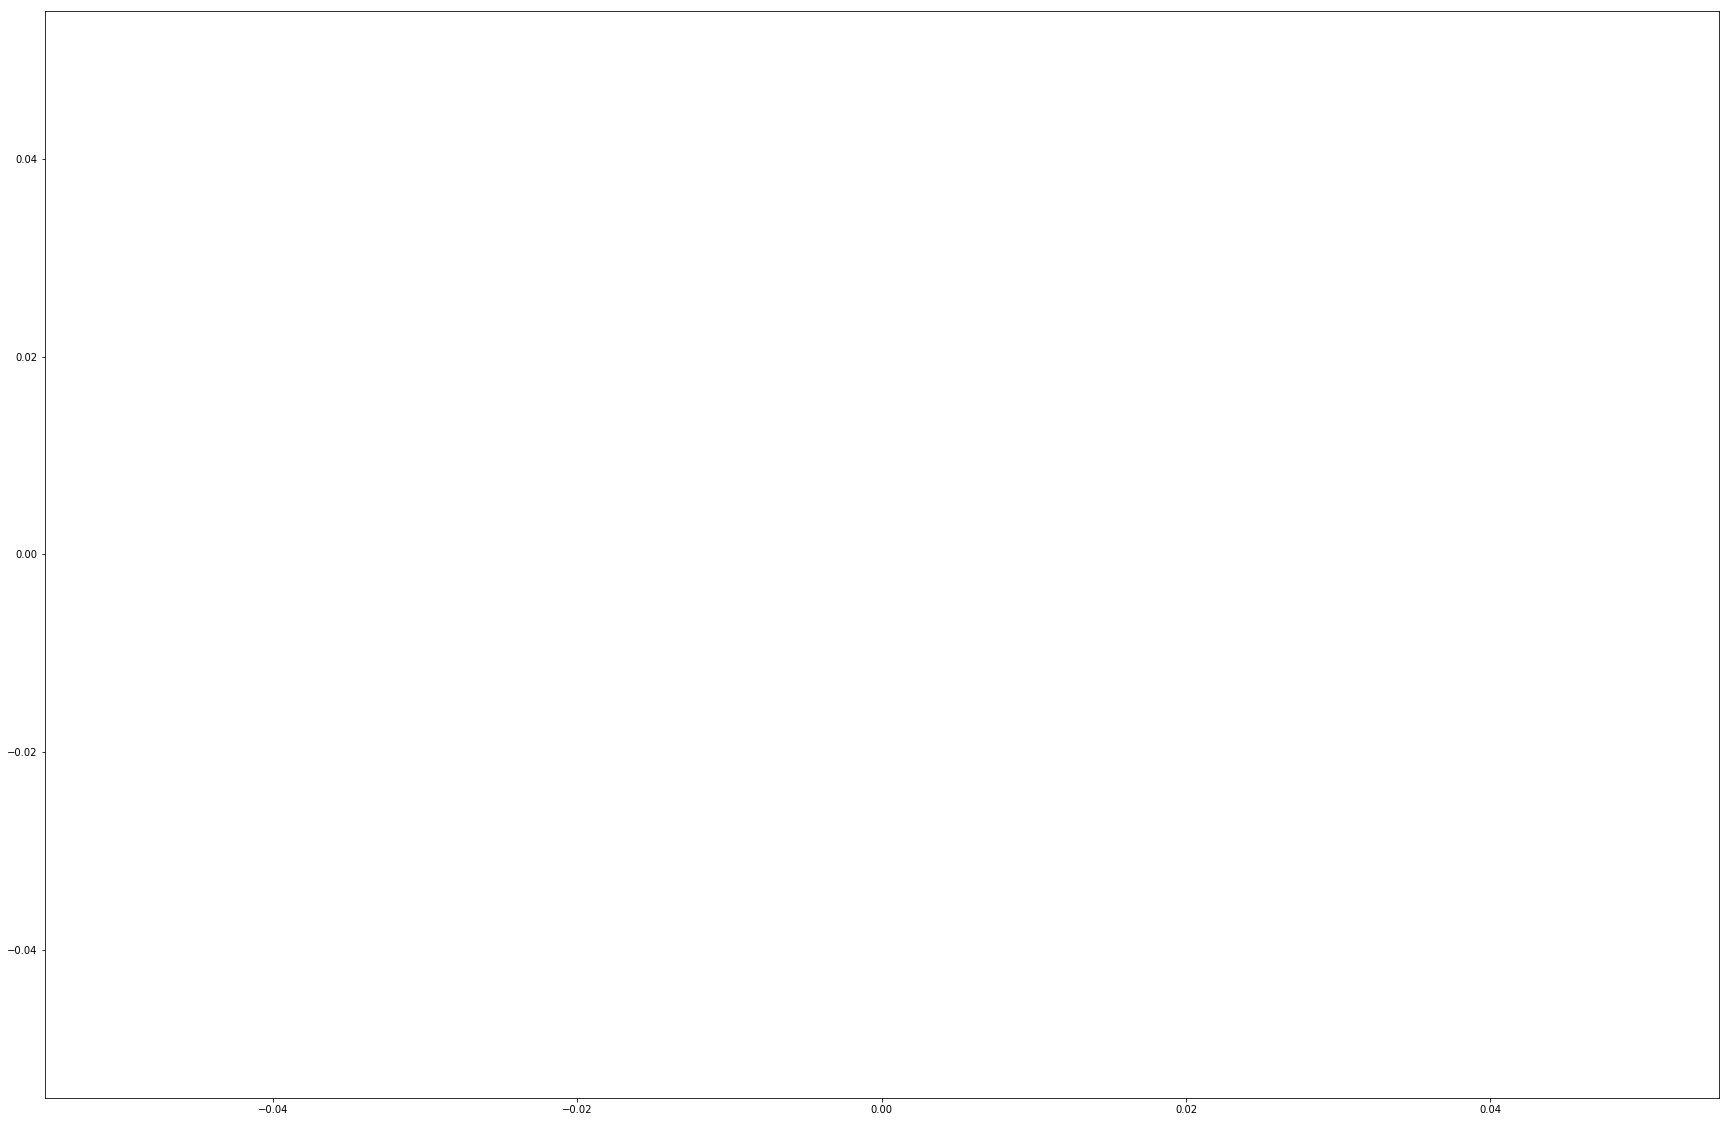

In [29]:
plt.figure(figsize=(30, 20))
sns.set_palette('Set2')
sns.lineplot(x='time_interval', y='available_bikes', data=df, hue='borough', ci=99)

In [4]:
df.head()

,station_id,station_name,latitude,longitude,zip,borough,hood,available_bikes,available_docks,time_interval,created_at,station_status,hour
0,72,W 52 St & 11 Ave,40.767272,-73.993929,10019,Manhattan,Hell's Kitchen,4,49,2019-05-02 01:30:00,2019-05-04 03:46:05,In Service,2019-05-02 01:00:00
1,72,W 52 St & 11 Ave,40.767272,-73.993929,10019,Manhattan,Hell's Kitchen,4,49,2019-05-02 01:45:00,2019-05-04 03:46:05,In Service,2019-05-02 01:00:00
2,72,W 52 St & 11 Ave,40.767272,-73.993929,10019,Manhattan,Hell's Kitchen,4,49,2019-05-02 02:00:00,2019-05-04 03:46:05,In Service,2019-05-02 02:00:00
3,72,W 52 St & 11 Ave,40.767272,-73.993929,10019,Manhattan,Hell's Kitchen,4,49,2019-05-02 02:15:00,2019-05-04 03:46:05,In Service,2019-05-02 02:00:00
4,72,W 52 St & 11 Ave,40.767272,-73.993929,10019,Manhattan,Hell's Kitchen,4,49,2019-05-02 02:30:00,2019-05-04 03:46:05,In Service,2019-05-02 02:00:00
